# Introduction to Financial Forecasting with Python

Welcome to our session on financial forecasting using Python! In this module, we'll dive into the fascinating world of time series analysis and prediction. We'll start by exploring a basic forecasting model using synthetic data to understand the fundamentals of time series forecasting. This will set the foundation for more complex analyses that you'll encounter in real-world financial data.

## The Original Code: A Starting Point
We begin with a Python script that generates synthetic financial data. This data simulates a simple financial time series with a linear trend and some random noise, mimicking a basic scenario in financial forecasting. We'll use this data to:

- Understand the structure of time series data.
- Learn how to split data appropriately for time series forecasting.
- Explore the application of linear regression in a time series context.
- Visualize and evaluate the performance of our forecasting model.

## Upcoming Assignment
After familiarizing yourselves with the original code, you will be tasked with an assignment that builds on these concepts. You'll apply your skills to real financial data, where you will:

- Engage in more complex feature engineering.
- Experiment with different forecasting models.
- Analyze and compare the performance of your models.

The details of the assignment will be provided later in this Jupyter Notebook. This will be your opportunity to apply the concepts learned in a more realistic and challenging setting.

So, let's get started with the original code and begin our journey into the world of financial forecasting!


In [ ]:
#!pip install pmdarima

# Paul's Code:

Mean Absolute Error (MAE): 2.73
Mean Squared Error (MSE): 11.42
Root Mean Squared Error (RMSE): 3.38


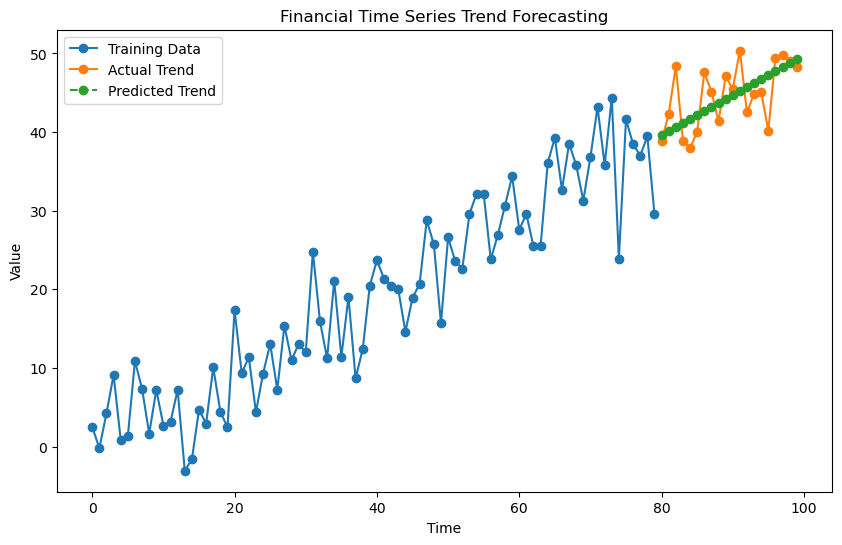

Mean Absolute Error (MAE): 3.64
Mean Squared Error (MSE): 21.54
Root Mean Squared Error (RMSE): 4.64


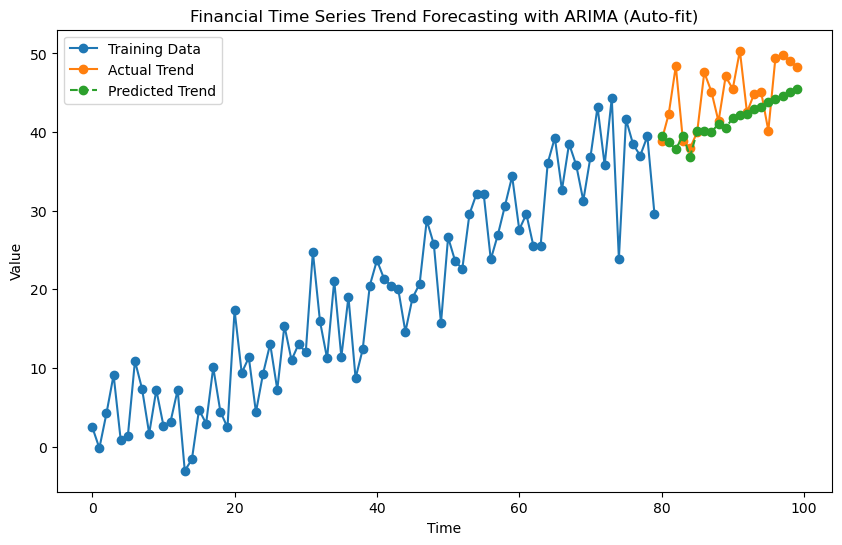

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pmdarima import auto_arima
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Generate synthetic financial data with a trend
np.random.seed(42)
n_points = 100
time = np.arange(n_points)
trend = 0.5 * time + np.random.normal(scale=5, size=n_points)
financial_data = pd.DataFrame({'Time': time, 'Trend': trend})

# Split the data into training and testing sets
train_size = int(0.8 * n_points)
train_data = financial_data.head(train_size).copy()
test_data = financial_data.tail(n_points - train_size).copy()

# Fit a linear regression model
model = LinearRegression()
model.fit(train_data[['Time']], train_data['Trend'])

# Predict the trend for the test set
test_data['Trend_Predicted'] = model.predict(test_data[['Time']])

# Calculate performance metrics
mae = mean_absolute_error(test_data['Trend'], test_data['Trend_Predicted'])
mse = mean_squared_error(test_data['Trend'], test_data['Trend_Predicted'])
rmse = np.sqrt(mse)

# Print performance metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# Plot the actual and predicted trends
plt.figure(figsize=(10, 6))
plt.plot(train_data['Time'], train_data['Trend'], label='Training Data', marker='o')
plt.plot(test_data['Time'], test_data['Trend'], label='Actual Trend', marker='o')
plt.plot(test_data['Time'], test_data['Trend_Predicted'], label='Predicted Trend', linestyle='--', marker='o')
plt.title('Financial Time Series Trend Forecasting')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

# Auto-fit ARIMA model
auto_model = auto_arima(train_data['Trend'], seasonal=False, suppress_warnings=True)
fit_model = auto_model.fit(train_data['Trend'])

# Forecast the trend for the test set
forecast = fit_model.predict(n_periods=len(test_data))

# Calculate performance metrics
mae = mean_absolute_error(test_data['Trend'], forecast)
mse = mean_squared_error(test_data['Trend'], forecast)
rmse = np.sqrt(mse)

# Print performance metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# Plot the actual and predicted trends
plt.figure(figsize=(10, 6))
plt.plot(train_data['Time'], train_data['Trend'], label='Training Data', marker='o')
plt.plot(test_data['Time'], test_data['Trend'], label='Actual Trend', marker='o')
plt.plot(test_data['Time'], forecast, label='Predicted Trend', linestyle='--', marker='o')
plt.title('Financial Time Series Trend Forecasting with ARIMA (Auto-fit)')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()

# Financial Forecasting in Python: Code Summary

## Overview
This code is a hands-on introduction to financial forecasting using Python. We generate synthetic financial data and apply two different forecasting models: Linear Regression and ARIMA. The goal is to predict future trends based on historical data.

## Key Components

### 1. Data Generation and Preprocessing
- We start by creating synthetic financial data. This approach is great for learning as it avoids the complexities of real-world data.
- The dataset is divided into two parts: training data for building our models and testing data for evaluating them.

### 2. Linear Regression Model
- First, we use a simple linear regression model. It's a basic yet powerful tool for trend forecasting.
- After fitting the model to the training data, we make predictions for the test data.
- We calculate Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE) to assess the model's accuracy.

### 3. ARIMA Model
- Next, we explore the ARIMA model, a more advanced method for time series forecasting.
- `auto_arima` helps us automatically find the best parameters for the ARIMA model.
- Like with linear regression, we evaluate the ARIMA model's performance using MAE, MSE, and RMSE.

### 4. Visualization
- We plot the actual and predicted trends for both models. This visual representation helps us understand how well our models are performing.
- By comparing these plots, you can visually assess the accuracy of each model.


## Conclusion
This code is a stepping stone into the world of financial forecasting. It provides a balance between theory and practice, making it suitable for all of you, regardless of your experience level in data science.

Remember, the key to learning data science is experimentation and curiosity. So, dive in, tweak the code, and see what insights you can uncover!


# Time Series Analysis Assignment: Predicting Stock Prices

## Core Assignment (100 points total)

### Setup and Data Acquisition (0 points)
```python
# Install yfinance package
!pip install yfinance

# Import yfinance and download Apple Inc. stock data
import yfinance as yf
stock_data = yf.download('AAPL', start='2022-01-01', end='2024-01-01')
```

### Objective:
Students will utilize provided financial data to construct predictive models using linear regression and exponential smoothing. They will then assess the models' performance using various metrics.

### Instructions and Point Breakdown:

- **Model Building (40 points)**
  - Implement linear regression using the rolling averages as features. (20 points)
  - Create an Exponential Smoothing model that accounts for trend and seasonality. (20 points)

- **Performance Metrics (20 points)**
  - Calculate Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE) for each model.
  - Provide commentary on the performance of each model based on these metrics.

- **Model Comparison and Interpretation (40 points)**
  - Compare the forecasted values against the actual values in the test set visually using a plot. (10 points)
  - Interpret the results of each model and discuss any potential reasons for differences in performance. (15 points)
  - Discuss the implications of model performance for real-world decision-making in finance. (15 points)

# Exponential Smoothing Overview

## What is Exponential Smoothing?

Exponential Smoothing is a time series forecasting method for univariate data. This technique is used to produce a smoothed time series, where the raw data points are weighted in such a way that the most recent data points have more influence on the forecast than older data points. It's particularly useful for data with trends and seasonal patterns.

## How is Exponential Smoothing Created?

The basic idea behind exponential smoothing is to compute the forecasted value at time `t` by applying weighted averages of past observations where the weights decay exponentially as observations get older. The formula for Simple Exponential Smoothing is:

$$ \hat{y}_{t+1} = \alpha y_t + (1 - \alpha) \hat{y}_t $$

where:
- $\hat{y}_{t+1}$ is the forecast for the next period.
- $y_t$ is the actual value at time `t`.
- $\hat{y}_t$ is the forecasted value at time `t`.
- $\alpha$ is the smoothing factor, ranging from 0 to 1.

## Unique Aspects of Exponential Smoothing

- **Adaptability**: It can adapt more quickly to changes in the level of the series.
- **Weighting**: Recent observations are given more weight, making it more responsive to changes in the data.
- **Simplicity**: It requires fewer parameters and is easier to understand and compute.

## When to Use Exponential Smoothing

It's most effective when your data:
- Shows no clear trend or seasonal patterns (Simple Exponential Smoothing).
- Shows a trend but no seasonality (Double Exponential Smoothing).
- Shows both trend and seasonality (Triple Exponential Smoothing, also known as Holt-Winters method).

## Example with Python Code

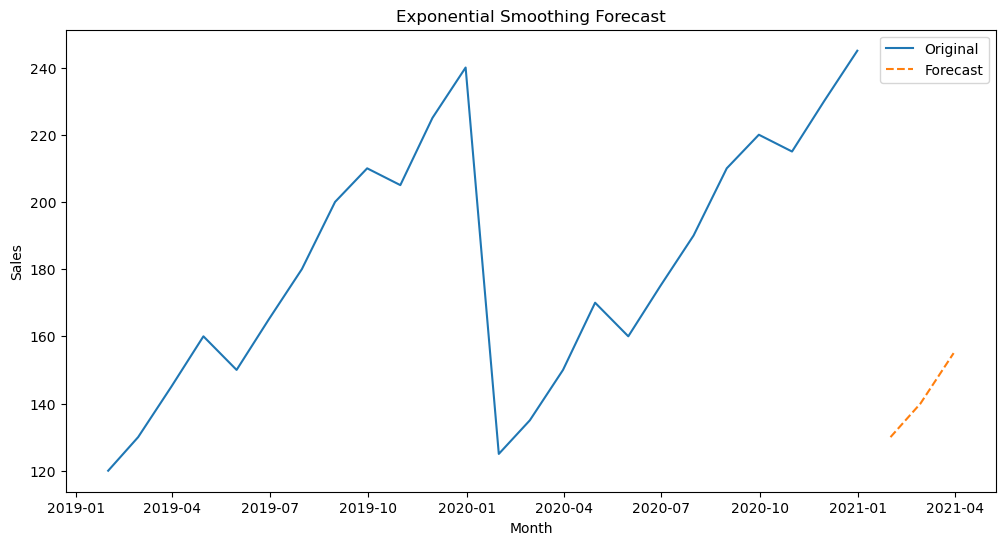

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Hypothetical monthly sales data for two years
data = [120, 130, 145, 160, 150, 165, 180, 200, 210, 205, 225, 240,
        125, 135, 150, 170, 160, 175, 190, 210, 220, 215, 230, 245]

# Convert data to pandas Series with a datetime index
index = pd.date_range(start='2019-01-01', periods=len(data), freq='M')
series = pd.Series(data, index=index)

# Apply Exponential Smoothing with trend and seasonality
model = ExponentialSmoothing(series, trend='add', seasonal='add', seasonal_periods=12).fit()

# Forecast the next 3 periods
forecast = model.forecast(3)

# Plot the original data and the forecast
plt.figure(figsize=(12, 6))
plt.plot(series, label='Original')
plt.plot(forecast, label='Forecast', linestyle='--')
plt.title('Exponential Smoothing Forecast')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.legend()
plt.show()


In [ ]:
#!pip install yfinance

# Modify this code for the assignment
## This code provides you with the data pull, moving averages and train/test split

[*********************100%%**********************]  1 of 1 completed


-------Raw Data-------
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2022-01-03  382.583344  400.356659  378.679993  399.926666  399.926666   
2022-01-04  396.516663  402.666656  374.350006  383.196655  383.196655   
2022-01-05  382.216675  390.113342  360.336670  362.706665  362.706665   
2022-01-06  359.000000  362.666656  340.166656  354.899994  354.899994   
2022-01-07  360.123322  360.309998  336.666656  342.320007  342.320007   

               Volume  
Date                   
2022-01-03  103931400  
2022-01-04  100248300  
2022-01-05   80119800  
2022-01-06   90336600  
2022-01-07   84164700  
-------Engineered Data-------
             Open        High         Low       Close   Adj Close  \
count  520.000000  520.000000  520.000000  520.000000  520.000000   
mean   240.179385  245.678910  234.208910  239.898211  239.898211   
std     56.227173   57.192509   54.698985   55.702876

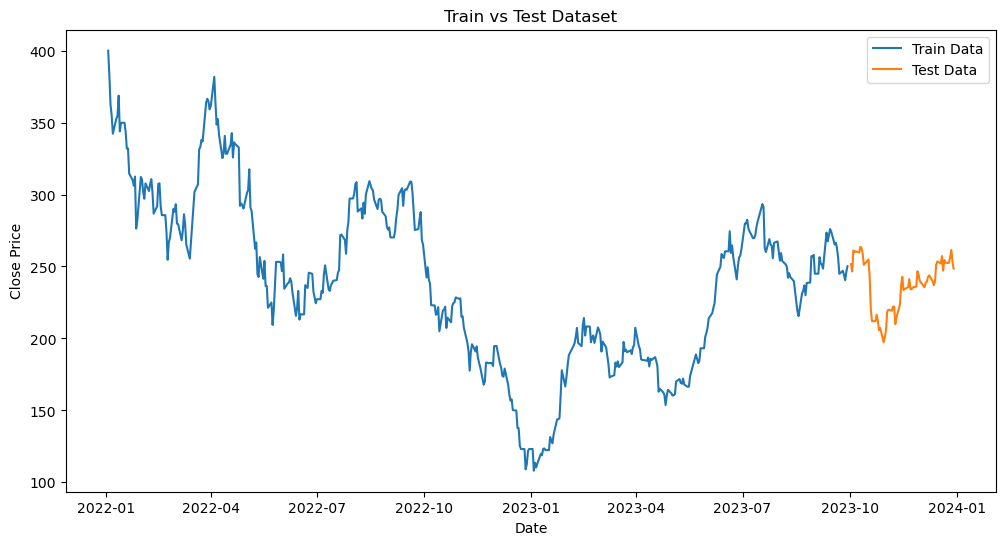

In [ ]:
# Import necessary libraries
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

# Data Acquisition
stock_data = yf.download('TSLA', start='2022-01-01', end='2024-01-01')
stock_data.sort_index(ascending=True, inplace=True)

# Ensure proper DatetimeIndex with frequency for time series analysis
stock_data.index = pd.to_datetime(stock_data.index)
stock_data = stock_data.asfreq('B', method='ffill')

print('-------Raw Data-------')
print(stock_data.head())

# Calculate rolling averages
stock_data['7_day_avg'] = stock_data['Close'].rolling(window=7, min_periods=1).mean()
stock_data['30_day_avg'] = stock_data['Close'].rolling(window=30, min_periods=1).mean()

print('-------Engineered Data-------')
print(stock_data.describe())

# Split the data into training and test sets
split_date = pd.to_datetime('2023-10-01')
train = stock_data.loc[stock_data.index < split_date]
test = stock_data.loc[stock_data.index >= split_date]

# Prepare the training and test data for Linear Regression
X_train = train[['7_day_avg', '30_day_avg']]
y_train = train['Close']
X_test = test[['7_day_avg', '30_day_avg']]

# Visualization of Train and Test Datasets
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['Close'], label='Train Data')
plt.plot(test.index, test['Close'], label='Test Data')
plt.title('Train vs Test Dataset')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

## Extra Credit Assignment (50 points total)

### Objective
Build an LSTM model to predict the closing prices of Apple Inc. (AAPL) stock and compare it to the models in the core assignment.

### Deliverables and Points Breakdown

1. **LSTM Model Implementation (30 points)**
   - Develop an LSTM model on the given dataset.
   - Ensure proper configuration and parameter tuning.

2. **Model Prediction and Visualization (10 points)**
   - Use the model to predict the test dataset.
   - Visualize the prediction results.

3. **Model Evaluation and Comparative Analysis (10 points)**
   - Evaluate the model using appropriate metrics.
   - Compare with the models from the core assignment and discuss the findings.